# Laboratorio 4 - Regresión y Clustering

## Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 3 - Bodega de Vino

In [1]:

%reset
#Importamos las librerías necesarias
#Numpy
import numpy as np
#Pandas
import pandas as pd
#Scikit-Learn
import sklearn as sk
#Matplotlib
import matplotlib.pyplot as plt


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Carga y Visualización de Datos

In [2]:
#Importamos el CSV
dataset = pd.read_csv('vinos.csv')
#Guardamos una copia del dataset original
datasetOriginal = dataset
#Mostramos los datos
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Limpieza de Datos

In [3]:
#Datos nulos
nulos = pd.DataFrame(dataset.isna().sum(), columns=["Número de nulos"])
nulos

,Número de nulos
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


No hay datos nulos por lo que podemos continuar sin problemas a la comprobación de "missing values"

In [4]:
#Datos missing
missing = pd.DataFrame(dataset.isnull().sum(), columns=["Número de missing values"])
missing

,Número de missing values
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


No hay 'missing values' por lo que podemos continuar sin problemas al siguiente paso, comprobar repetidos

In [5]:
tamOrig = dataset.shape
print('Tamaño del dataset sin eliminar datos duplicados: ', tamOrig)
dataset = dataset.drop_duplicates()
nuevoTam = dataset.shape
print('Eliminando los duplicados, el dataset queda del tamaño: ', nuevoTam)
if tamOrig == nuevoTam:
    print('No hay datos duplicados')
else:
    print('Se han eliminado,', tamOrig[0] - nuevoTam[0],'datos duplicados')

Tamaño del dataset sin eliminar datos duplicados:  (178, 13)
Eliminando los duplicados, el dataset queda del tamaño:  (178, 13)
No hay datos duplicados


Ya hemos terminado el apartado de la limpieza de los datos, pasamos a preprocesarlos

### Preprocesamiento de Datos

In [6]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
dataset.shape

(178, 13)

Habría que filtrar solo algunas columnas pero no se cuales son más válidas que otras

In [8]:
data = dataset.values
data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

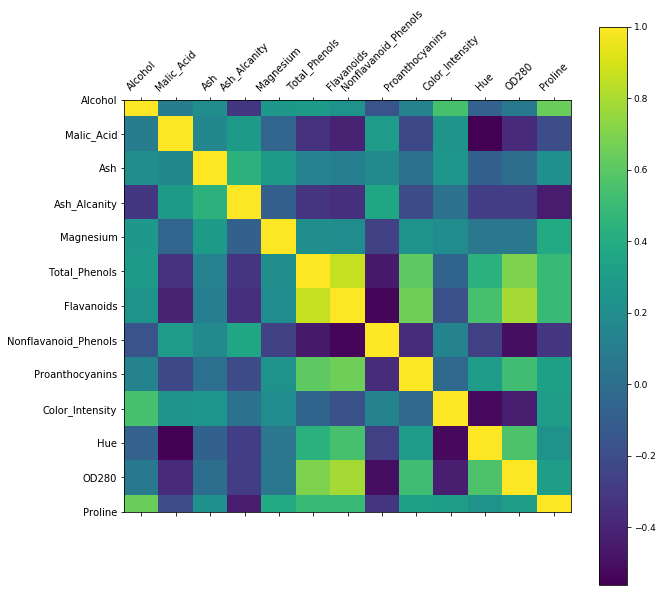

In [33]:
matrizC = plt.figure(figsize=(10, 10))

plt.matshow(dataset.corr(), fignum = matrizC.number)

plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=10, rotation=45)
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=10)

leyenda = plt.colorbar()
leyenda.ax.tick_params(labelsize=9)

<Figure size 14400x14400 with 0 Axes>

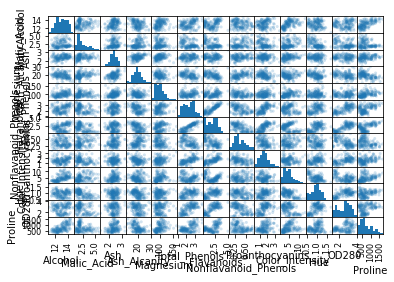

In [43]:
plt.figure(figsize=(200, 200))

scater = pd.plotting.scatter_matrix(dataset, alpha=0.2)


El dendograma nos ayuda a elegir el número de clusters necesarios

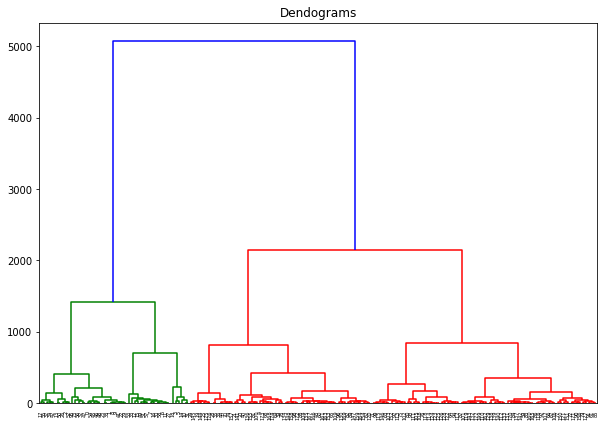

In [9]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

Una vez tenemos el dendograma podemos ver el número de clusters más óptimo para implementar en el Agglomerative Clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

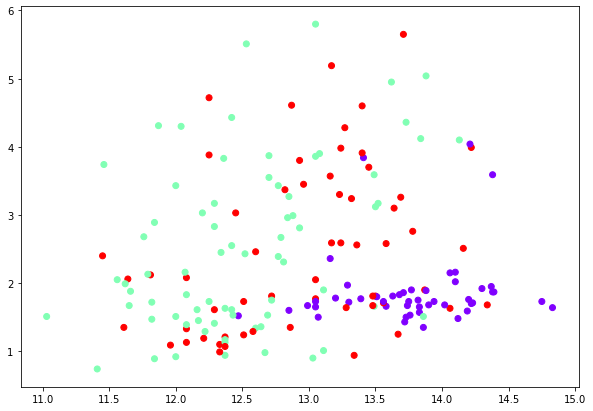

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')